# Install dependencies

In [1]:
pip install nnunet
pip install monai

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 251 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 25.6 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 293 kB/s eta 0:00:011     |██████████████████████████▌     | 51 kB 851 kB/s eta 0:00:01
     |████████████████████████████████| 48.4 MB 54.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 62.1 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 61.8 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 50.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 59.3 MB/s eta 0:00:01
  Created wheel for nnunet: filename=nnunet-1.7.0-py3-none-any.whl size=487823 sha256=9403fc2eedc1f9e2717afd913d5e7e02fa003decf227a9ea338312f08738e9ab
  Stored in directory: /home/featurize/.cache/pip/wheels/4b/d0/f1/183f4f490dd87db219fb91523224cb0fe3074307ebb46aff1e
  Created wheel for batchgenerators: filename=batchgene

# Thigh muscle segmentation (nnU-Net)

In [1]:
# Requiremnts
import os
import shutil
import nnunet



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet



In [2]:
 # Set environment Variables
    
def make_if_dont_exist(folder_path,overwrite=False):
    """
    creates a folder if it does not exists
    input: 
    folder_path : relative path of the folder which needs to be created
    over_write :(default: False) if True overwrite the existing folder 
    """
    if os.path.exists(folder_path):
        
        if not overwrite:
            print(f"{folder_path} exists.")
        else:
            print(f"{folder_path} overwritten")
            shutil.rmtree(folder_path)
            os.makedirs(folder_path)

    else:
      os.makedirs(folder_path)
      print(f"{folder_path} created!")

mount_dir = os.getcwd()

# Check if the model is located in the right place

print("Current Working Directory {}".format(os.getcwd()))
path_dict = {
    "nnUNet_raw_data_base" : os.path.join(mount_dir, "nnUNet_raw_data_base"), 
    "nnUNet_preprocessed" : os.path.join(mount_dir, "nnUNet_preprocessed"), 
    "RESULTS_FOLDER" : os.path.join(mount_dir, "nnUNet_Results_Folder")
}

# Write paths to environment variables
for env_var, path in path_dict.items():
  os.environ[env_var] = path 

# Check whether all environment variables are set correct!
for env_var, path in path_dict.items():
  if os.getenv(env_var) != path:
    print("Error:")
    print("Environment Variable {} is not set correctly!".format(env_var))
    print("Should be {}".format(path))
    print("Variable is {}".format(os.getenv(env_var)))
  make_if_dont_exist(path, overwrite=False)

print("If No Error Occured Continue Forward. =)")


Current Working Directory /home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration
/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/nnUNet_raw_data_base exists.
/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/nnUNet_preprocessed exists.
/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/nnUNet_Results_Folder exists.
If No Error Occured Continue Forward. =)


In [3]:
# location where you want save your results, will be created if dont exist
# WARNING! Postprocessing does not improve the results by a lot. You can ignore it and just run without postprocessing :-)
!nnUNet_predict -i './Input_data' -o './Output_segmentation' -t 501 -tr nnUNetTrainerV2 -m 3d_fullres #--num_threads_preprocessing 1



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/nnUNet_Results_Folder/nnUNet/3d_fullres/Task501_ThighMuscles/nnUNetTrainerV2__nnUNetPlansv2.1
This model expects 2 input modalities for each image
Found 3 unique case ids, here are some examples: ['Thigh_001' 'Thigh_001' 'Thigh_003']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 3
number of cases that still need to be predicted: 0
emptying cuda cache
loading parameters for folds, None
folds is None so we will automatically look for output folders (not usi

# Fat fraction calculation

In [4]:
# Requiremnts
import os
import shutil
import glob
import matplotlib
import numpy
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from monai.config import print_config
from monai.transforms import (LoadImage, LoadImaged)

os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"

print_config()


MONAI version: 0.9.0
Numpy version: 1.21.4
Pytorch version: 1.10.0+cu113
MONAI flags: HAS_EXT = False, USE_COMPILED = False
MONAI rev id: af0e0e9f757558d144b655c63afcea3a4e0a06f5
MONAI __file__: /environment/miniconda3/lib/python3.7/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 4.0.1
scikit-image version: 0.19.0
Pillow version: 8.4.0
Tensorboard version: 2.7.0
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.11.1+cu113
tqdm version: 4.61.2
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: NOT INSTALLED or UNKNOWN VERSION.
pandas version: 1.3.4
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.ht

In [5]:
# Setup data directory
directory = os.environ.get("MONAI_DATA_DIRECTORY")
root_dir = os.getcwd() if directory is None else directory
print(root_dir)


# set Rawdata_dicts
fat_series = sorted(
    glob.glob(os.path.join(root_dir, "Input_data", "*0000.nii.gz")))
water_series = sorted(
    glob.glob(os.path.join(root_dir,  "Input_data", "*0001.nii.gz")))
mask_series = sorted(
    glob.glob(os.path.join(root_dir, "Output_segmentation", "*.nii.gz")))

Rawdata_dicts = [
    {"fat": fat_name, "water": water_name, "label": label_name}
    for fat_name, water_name, label_name,  in zip(fat_series, water_series, mask_series)
]

print(f"Rawdata_dicts example: \n {Rawdata_dicts[0]} \n")
print(f"Rawdata_dicts length: \n {len(Rawdata_dicts)} \n")
Rawdata_dicts

/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration
Rawdata_dicts example: 
 {'fat': '/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/Input_data/Thigh_001_0000.nii.gz', 'water': '/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/Input_data/Thigh_001_0001.nii.gz', 'label': '/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/Output_segmentation/Thigh_001.nii.gz'} 

Rawdata_dicts length: 
 3 



[{'fat': '/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/Input_data/Thigh_001_0000.nii.gz',
  'water': '/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/Input_data/Thigh_001_0001.nii.gz',
  'label': '/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/Output_segmentation/Thigh_001.nii.gz'},
 {'fat': '/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/Input_data/Thigh_002_0000.nii.gz',
  'water': '/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/Input_data/Thigh_002_0001.nii.gz',
  'label': '/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/Output_segmentation/Thigh_002.nii.gz'},
 {'fat': '/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/Input_data/Thigh_003_0000.nii.gz',
  'water': '/home/featurize/Rapid-automatic-fat-quantification-for-thigh-muscle-degeneration/Input_d

/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


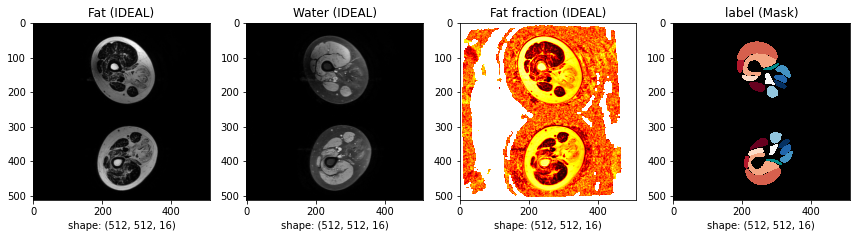

In [6]:
# Preview

loadraw = LoadImaged(keys=["fat", "label", "water"])

Rawdata_dict_eg = loadraw(Rawdata_dicts[0])

fat, water, label = Rawdata_dict_eg["fat"], Rawdata_dict_eg["water"], Rawdata_dict_eg["label"]

Fatfraction_denominator = np.add(fat, water)
Fatfraction = np.divide(fat, Fatfraction_denominator)

fig, ax = plt.subplots(1,4, figsize=(12, 48))

cmap = matplotlib.colors.ListedColormap(['#000000', '#67001f', '#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#f7f7f7', '#92c5de', '#4393c3', '#2166ac', '#053061', '#008b8b'])

ax[0].imshow(fat[:, :, 5], cmap="gray")
ax[0].set(title='Fat (IDEAL)', xlabel= f"shape: {fat.shape}", ylabel='')
ax[1].imshow(water[:, :, 5], cmap="gray")
ax[1].set(title='Water (IDEAL)', xlabel= f"shape: {water.shape}", ylabel='')
ax[2].imshow(Fatfraction[:, :, 5], cmap="hot")
ax[2].set(title='Fat fraction (IDEAL)', xlabel= f"shape: {Fatfraction.shape}", ylabel='')
ax[3].imshow(label[:, :, 5], interpolation='nearest', cmap=cmap)
ax[3].set(title='label (Mask)', xlabel= f"shape: {label.shape}", ylabel='')

fig.tight_layout()

In [7]:
def IDEAL_caculator(Rawdata_dict_one):
    '''calculate each muscle voxel sum, fatfraction sum, and average fatfraction in each instance '''
    import warnings
    warnings.simplefilter('ignore')
    Rawdata_dict_one = loadraw(Rawdata_dict_one)
    address = Rawdata_dict_one['fat_meta_dict']['filename_or_obj']
    patient_name = re.search("Thigh_\d+", address).group(0)
    voxel_size = numpy.prod(Rawdata_dict_one['fat_meta_dict']['pixdim'][1:4])
    fat, water, label = Rawdata_dict_one["fat"], Rawdata_dict_one["water"], Rawdata_dict_one["label"]
    Fatfraction_denominator = numpy.add(fat, water)
    Fatfraction = numpy.divide(fat, Fatfraction_denominator)
    voxel_values = []
    fatfraction_values = []
    aver_fatfraction_values = []
    for n in range(1, 12):
        voxel_sum = (np.count_nonzero(label == n))*voxel_size*0.001
        mask = label == n
        fatfraction_sum = (sum(Fatfraction[mask]))*voxel_size*0.001
        aver_fatfraction = fatfraction_sum/voxel_sum
        voxel_values.append(voxel_sum)
        fatfraction_values.append(fatfraction_sum)
        aver_fatfraction_values.append(aver_fatfraction)
    return patient_name, voxel_values, fatfraction_values, aver_fatfraction_values



patient = []; SA = []; RF = []; VL = []; VI = []; VM = []; AM = []; GR = []; BL = []; ST = []; SM = []; BB = []

for a in Rawdata_dicts:
    patient_name, voxel_values, fatfraction_values, aver_fatfraction_values = IDEAL_caculator(a)
    patient.append(patient_name)
    SA.append(aver_fatfraction_values[0])
    RF.append(aver_fatfraction_values[1])
    VL.append(aver_fatfraction_values[2])
    VI.append(aver_fatfraction_values[3])
    VM.append(aver_fatfraction_values[4])
    AM.append(aver_fatfraction_values[5])
    GR.append(aver_fatfraction_values[6])
    BL.append(aver_fatfraction_values[7])
    ST.append(aver_fatfraction_values[8])
    SM.append(aver_fatfraction_values[9])
    BB.append(aver_fatfraction_values[10])

fatfraction_table = {'patient': patient, 'SA': SA, 'RF': RF, 'VL': VL, 'VI': VI, 'VM': VM, 'AM': AM, 'GR': GR, 'BL': BL, 'ST': ST, 'SM': SM, 'BB': BB}
pd.DataFrame(fatfraction_table)#.to_csv('./Output_fat_fraction/fat fraction.csv', encoding='utf_8_sig', index=False)

,patient,SA,RF,VL,VI,VM,AM,GR,BL,ST,SM,BB
0,Thigh_001,0.182836,0.537026,0.309223,0.343359,0.300494,0.648822,0.235308,0.639768,0.649394,0.617633,0.418268
1,Thigh_002,0.163060,0.501802,0.536133,0.529328,0.503416,0.405981,0.118544,0.618817,0.542495,0.672286,0.156817
2,Thigh_003,0.205246,0.215608,0.330503,0.369018,0.349797,0.224268,0.127358,0.325287,0.201906,0.266562,0.198464
